# <font color='orange'>**DATA PRE-PROCESSING**</font>

## <font color = 'sky blue'>**Import Libraries**</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import glob

## <font color = 'sky blue'>**Import Dataset**</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PATH = "/content/drive/My Drive/Dataset/"
path = "/content/drive/My Drive/Dataset/Trimmed_raw_data/..."

Mounted at /content/drive


In [ ]:
#Download
df_large = pd.read_csv(f"{PATH}all_merged_labeled_data.csv")
df_small = pd.read_csv(f"{PATH}Mod_all.csv")
df_bi = pd.read_csv(f"{PATH}labeled_data.csv")

df_large.info()
df_small.info()
df_bi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218669 entries, 0 to 218668
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time_start     218669 non-null  float64
 1   accelerationX  218669 non-null  float64
 2   accelerationY  218669 non-null  float64
 3   accelerationZ  218669 non-null  float64
 4   time_end       218669 non-null  float64
 5   rotationX      218669 non-null  float64
 6   rotationY      218669 non-null  float64
 7   rotationZ      218669 non-null  float64
 8   Class          218669 non-null  int64  
 9   Activity       218669 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 16.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time_start     36000 non-null  float64
 1   accelerationX  36000 non-null  float64
 

In [ ]:
from sklearn.utils import shuffle
df1 = shuffle(df_large)
df1.head(10)

,time_start,accelerationX,accelerationY,accelerationZ,time_end,rotationX,rotationY,rotationZ,Class,Activity
77143,0.985,-1.108800,1.500600,1.491800,0.987,-0.011942,0.445270,-0.113360,6,Lay-stand
126440,0.377,-0.296910,-0.046239,0.960180,0.370,0.153020,0.969970,0.357140,10,Sit-up
157647,27.076,-1.860100,-1.801300,-2.240700,27.071,0.522820,-0.018320,-0.099950,12,Walk-backwards
77387,3.425,0.047918,-0.015423,0.066059,3.427,0.000886,0.056762,0.003922,6,Lay-stand
67659,35.072,0.077191,-0.001148,0.162800,35.083,-0.000690,-0.005333,0.000397,5,Lay
187462,45.927,4.974700,3.850000,3.851600,45.922,-0.066059,0.270620,0.557950,15,Stair-up
88512,5.549,-1.590900,1.765300,0.486290,5.533,0.449900,0.518350,-0.070164,7,Pick
873,8.741,-0.027880,-0.080023,-0.009709,8.743,-0.014093,-0.027232,-0.003323,0,Stand
154201,3.265,1.485100,3.457500,-0.618970,3.267,-0.186590,-1.153700,0.147680,12,Walk-backwards
185818,29.487,0.223320,0.201400,-2.939200,29.482,-0.909660,0.127680,0.251910,15,Stair-up


In [ ]:
df2 = shuffle(df_small)
df2.head(10)

,time_start,accelerationX,accelerationY,accelerationZ,time_end,rotationX,rotationY,rotationZ,Class,Activity
22558,6.584,2.148000,-4.765100,2.397500,6.590,-0.325070,0.045821,0.168830,11,Walk
10175,1.760,-0.095762,-0.058452,0.248580,1.751,-0.006707,0.001863,0.004533,5,Lay
20017,0.178,0.483000,0.799770,0.004817,0.173,0.065051,0.156720,0.004972,10,Sit-up
34613,6.204,7.874600,7.573200,-4.333800,6.204,1.700100,-0.494010,0.669820,17,Table-tennis
35362,13.777,-11.146000,-2.820200,-2.415700,13.776,-0.870420,0.279380,0.012550,17,Table-tennis
19777,8.723,0.085897,0.122040,0.151710,8.725,-0.062986,0.133470,0.090573,9,Push-up
35694,17.131,-4.350000,0.165090,2.889400,17.132,0.954380,0.170720,0.077531,17,Table-tennis
11627,16.280,-0.040349,-0.030930,0.160040,16.281,0.002932,-0.007514,0.003012,5,Lay
16123,1.237,8.165700,-1.654500,8.999000,1.233,-0.122740,0.401520,-0.062516,8,Jump
745,7.461,-0.020153,-0.030389,0.036634,7.463,-0.021423,-0.016237,-0.015540,0,Stand


In [ ]:
df_large['Activity'].value_counts()

Stand             13967
Walk-circle       13644
Pick              13173
Stair-down        13005
Lay               12891
Talk-sit          12828
Talk-stand        12596
Stand-sit         12475
Table-tennis      12302
Sit               12288
Push-up           12050
Sit-up            11981
Walk-backwards    11780
Jump              11123
Run               10981
Lay-stand         10915
Stair-up          10491
Walk              10179
Name: Activity, dtype: int64

In [ ]:
df_small['Activity'].value_counts()

Stand             2000
Sit               2000
Stair-down        2000
Stair-up          2000
Run               2000
Walk-circle       2000
Walk-backwards    2000
Walk              2000
Sit-up            2000
Push-up           2000
Jump              2000
Pick              2000
Lay-stand         2000
Lay               2000
Stand-sit         2000
Talk-stand        2000
Talk-sit          2000
Table-tennis      2000
Name: Activity, dtype: int64

## <font color = 'sky blue'>**Feature and Target Splitting**</font>

In [ ]:
df_large.drop_duplicates()
df_large.dropna()
# target = df['Class']
# features = df.drop(['Activity','Class'], axis=1)
# features.head()

#splitting features and target class
x1 = df_large.iloc[:, :-2].values
y1 = df_large.iloc[:, -2].values

In [ ]:
df_small.drop_duplicates()
df_small.dropna()

#splitting features and target class
x2 = df_small.iloc[:, :-2].values
y2 = df_small.iloc[:, -2].values

## <font color = 'sky blue'>**Data Distribution**</font>

In [ ]:
features = df_large.drop(['Activity','Class'], axis=1)
features.head()

,time_start,accelerationX,accelerationY,accelerationZ,time_end,rotationX,rotationY,rotationZ
0,0.003,0.004230,0.005034,-0.020325,0.005,-0.000043,0.012474,-0.000880
1,0.013,-0.000280,0.011153,-0.022526,0.014,-0.000654,0.011252,-0.001491
2,0.021,-0.013218,0.026723,-0.023402,0.023,-0.002486,0.002089,-0.002101
3,0.031,-0.006041,0.035018,-0.004268,0.033,-0.004930,0.005143,-0.000880
4,0.041,0.019178,0.045794,-0.002172,0.043,-0.007373,0.005754,-0.000880


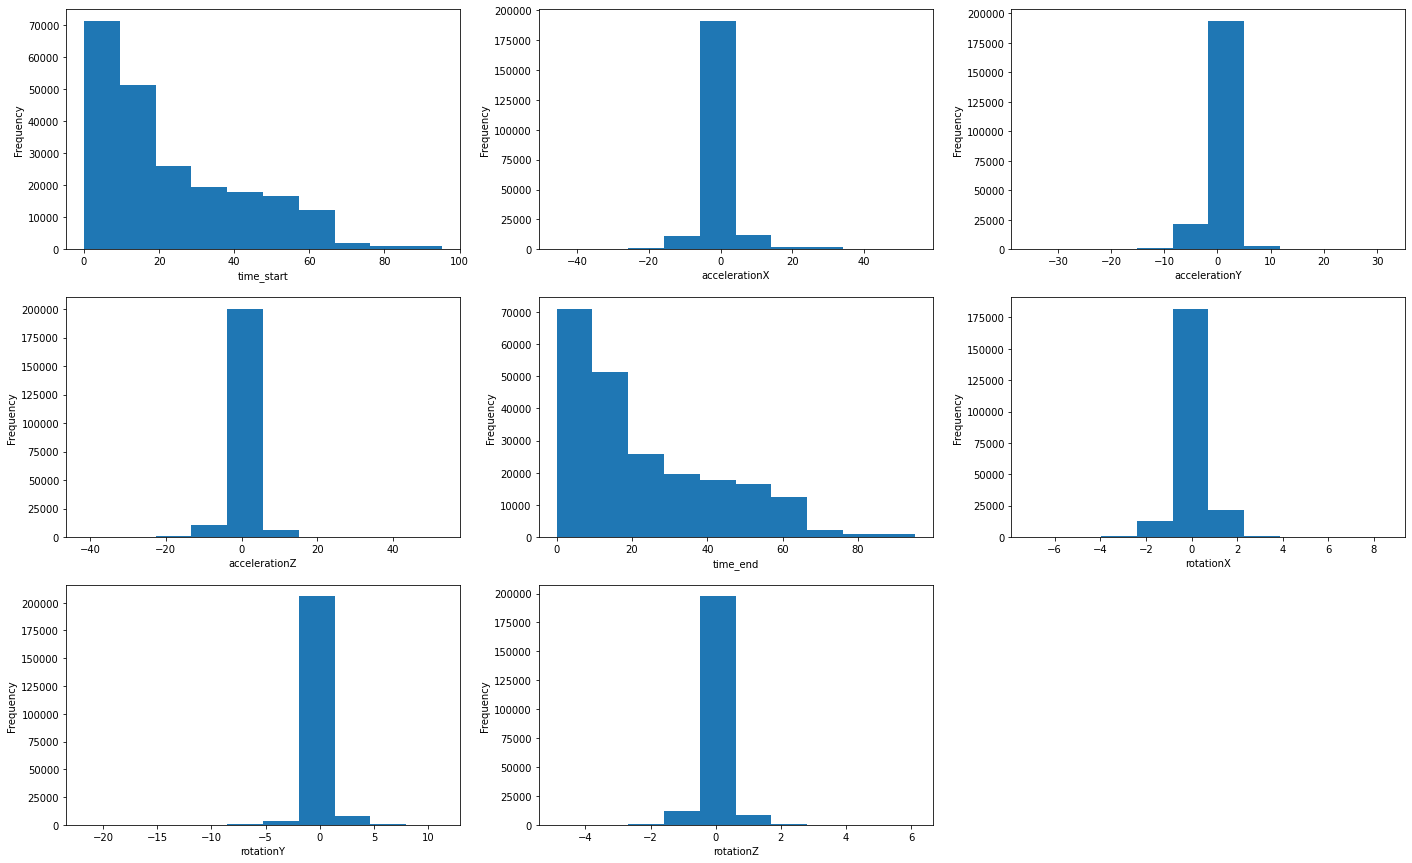

In [ ]:
fig = plt.figure(figsize = (24,15))
i=0
for column in features:
  sub = fig.add_subplot(3,3, i+1)
  sub.set_xlabel(column)
  features[column].plot(kind='hist')
  i= i+1

## <font color = 'sky blue'>**Splitting the Dataset**</font>

In [ ]:
# for df_large
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x1,
    y1,
    stratify=y1,
    test_size=0.2,
    random_state=0)

x_train1.shape, x_test1.shape,y_train1.shape, y_test1.shape

((174935, 8), (43734, 8), (174935,), (43734,))

In [ ]:
#for df_small
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x2,
    y2,
    stratify=y2,
    test_size=0.2,
    random_state=0)

x_train2.shape, x_test2.shape,y_train2.shape, y_test2.shape

((28800, 8), (7200, 8), (28800,), (7200,))

## <font color = 'sky blue'>**Perform Feature Scaling**</font>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [ ]:
print(x_train1)

[[-0.4360931   0.06496199  0.05816645 ...  0.16372258  1.28779684
   1.01146512]
 [-0.34151418  0.21147162 -0.73893689 ...  3.29575985  0.1316376
   3.11719063]
 [-0.49734567 -0.45021915  1.09607104 ... -0.9198813   0.31077274
  -0.75530587]
 ...
 [ 0.74910051 -0.02249393  0.02378055 ... -0.09057661 -0.04123818
  -0.01616025]
 [ 0.62160669 -0.00921747  0.0159729  ... -0.0955047  -0.01686007
  -0.00800082]
 [ 0.23254227  2.53316707 -0.54829404 ... -0.09683251  0.24458255
   0.41789699]]


# <font color='orange'>**MODEL TRAINING**</font>

## <font color = 'sky blue'>**Import Libraries**</font>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch import tensor

from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout

from sklearn.metrics import mean_squared_error

from tensorflow.python.keras import optimizers as opt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.python.keras.layers import LSTM,GRU
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.models import load_model



In [ ]:
x_train = tf.tensor(x_train)
x_test = tf.tensor(x_test) 
y_train = tf.tensor(y_train) 
y_test = tf.tensor(y_test)

AttributeError: ignored

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
y_test=tensor(y_test, dtype=torch.float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [ ]:
y_test.dtype

dtype('int64')

In [ ]:
y_train=tensor(y_train, dtype=torch.float64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


## <font color = 'sky blue'>**Logistic Regression**</font>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(multi_class='ovr',solver='saga')

lr1.fit(x_train1, y_train1)
y_pred1 = lr1.predict(x_test1)

print('Training score : ',lr1.score(x_train1,y_train1))

print('predictions are :\n',y_pred1)
print('\n')


Training score :  0.26038194444444446
predictions are :
 [ 6 15 15 ...  0 13 13]




In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test1, y_pred1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test1, y_pred1,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test1, y_pred1,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test1, y_pred1,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.261667
Precision: 0.242884
Recall: 0.261667
F1 score: 0.228666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
#predictions with the model
#predictions = (lr.predict(x_test) > 0.5).astype(int)
print('Predicted       :     Actual \n')
for i in range(5):
	print('(predicted %d) ==> (expected %d)' % ( y_pred1[i], y_test1[i]))

Predicted       :     Actual 

(predicted 6) ==> (expected 9)
(predicted 15) ==> (expected 14)
(predicted 15) ==> (expected 3)
(predicted 13) ==> (expected 17)
(predicted 15) ==> (expected 11)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
cm = confusion_matrix(y_test1, y_pred1)
print(cm)
print(accuracy_score(y_test1, y_pred1))
print(f1_score(y_test1, y_pred1,average='micro'))

[[291  38  29   0   9   5   0   0   0   0  14  12   2   0   0   0   0   0]
 [  0 368  31   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [ 37  18  19  71  33  32  28  50   6  14  31  29  26   0   0   0   3   3]
 [  0   0   0   0   1   0   6  13   8   0   1   1   3 162   9 167  11  18]
 [  1   0   0   6  82  16  28  21 107  19  10   0   6  22   3  27  51   1]
 [  1  32   0   0   0 358   0   0   6   0   0   3   0   0   0   0   0   0]
 [  7   1   0   4  13  22  47  22  23   1   8   2   0 104   8  83  20  35]
 [  0   0   0   4   3   1  53  49  20   9   2   1   3  85  15 103  24  28]
 [  0   0   0   1   3   0  28  31  71   2   1   0   9  74 103  53   6  18]
 [  1   0   0   1  11   0  25  24  57   4   6   1  26  49  33  87  40  35]
 [  2   0   0  12  22   5  89  63  30   1   9   4  30   7  29  47  36  14]
 [  1   0   1   5   1   1  10   6  42   0   7   6  15  81  53 116  25  30]
 [  4   0   0   3   0   0  23  17  45   0   2   0   9  78  35 106  31  47]
 [  0   0   0   0   1   0

## <font color = 'sky blue'>**Artificial Neural Network(ANN)**</font>

In [ ]:
# Define ANN Model
model_ann = Sequential()
model_ann.add(keras.Input(shape=(8,)))
model_ann.add(Dense(32, activation = 'relu'))
model_ann.add(Dense(200, activation = 'relu'))
model_ann.add(Dense(800, activation = 'relu'))
model_ann.add(Dense(1024, activation = 'relu'))
model_ann.add(Dense(512, activation = 'relu'))
model_ann.add(Dense(256, activation = 'relu'))
model_ann.add(Dense(128, activation = 'relu'))
model_ann.add(Dense(64, activation = 'relu'))
model_ann.add(Dense(36, activation = 'relu'))
model_ann.add(Dense(18, activation = 'softmax'))

model_ann.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                288       
                                                                 
 dense_53 (Dense)            (None, 200)               6600      
                                                                 
 dense_54 (Dense)            (None, 800)               160800    
                                                                 
 dense_55 (Dense)            (None, 1024)              820224    
                                                                 
 dense_56 (Dense)            (None, 512)               524800    
                                                                 
 dense_57 (Dense)            (None, 256)               131328    
                                                                 
 dense_58 (Dense)            (None, 128)              

In [ ]:
#Train df_large
model_ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist_ann = model_ann.fit(x_train1, y_train1, epochs=10, batch_size=500)
_, accuracy = model_ann.evaluate(x_train1, y_train1)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
350/350 [==============================] - 42s 116ms/step - loss: 0.1327 - accuracy: 0.9521
Epoch 2/10
350/350 [==============================] - 41s 116ms/step - loss: 0.1245 - accuracy: 0.9561
Epoch 3/10
350/350 [==============================] - 41s 116ms/step - loss: 0.1240 - accuracy: 0.9561
Epoch 4/10
350/350 [==============================] - 39s 110ms/step - loss: 0.1150 - accuracy: 0.9591
Epoch 5/10
350/350 [==============================] - 41s 116ms/step - loss: 0.1184 - accuracy: 0.9577
Epoch 6/10
350/350 [==============================] - 39s 110ms/step - loss: 0.1179 - accuracy: 0.9581
Epoch 7/10
350/350 [==============================] - 42s 119ms/step - loss: 0.1112 - accuracy: 0.9606
Epoch 8/10
350/350 [==============================] - 41s 116ms/step - loss: 0.1077 - accuracy: 0.9622
Epoch 9/10
350/350 [==============================] - 39s 110ms/step - loss: 0.1080 - accuracy: 0.9620
Epoch 10/10
5467/5467 [==============================] - 40s 7ms/step - l

In [ ]:
#predictions with the model
predictions = (model_ann.predict(x_test1) > 0.5).astype(int)
print('Predicted       :     Actual \n')
for i in range(5):
	#  print('(predicted %d) ==> (expected %d)' % ( predictions[i,:], y_test[i]))
	 print( predictions[i], y_test1[i])

Predicted       :     Actual 

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 3
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0] 9
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 2
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0] 11
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 3


In [ ]:
y_pred = np.array([x.argmax() for x in predictions])
print(y_pred)

[ 7 13  2 ...  5  4  2]


In [ ]:
from sklearn import metrics
accuracy = accuracy_score(y_test1, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.816664
Precision: 0.815420
Recall: 0.812874
F1 score: 0.812834


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test1, y_pred)
print(cf_matrix)

[[2364  320   56    0   10   15   11    0    0    0    0    7    8    0
     0    0    2    0]
 [  38 2408    7    0    0    5    0    0    0    0    0    0    0    0
     0    0    0    0]
 [ 109   10 2374    0   20   19   18    2    0    0   10    2    1    0
     0    0    1    0]
 [  22    0    0 2275    6    0   15   53    0   27    7    2   14   15
     0   39   26   18]
 [  45    0   26    5 2241    6   14   10    2   39   81    8   11    2
     0    2    1    2]
 [   3    0    0    0    0 2575    0    0    0    0    0    0    0    0
     0    0    0    0]
 [  46    0   25   32   34   13 1740   85    2   41   37    8   24   18
    10   13   24   31]
 [  28    0    9   35   18    0   43 2317    3   41   17    6   27   11
     3   23   26   28]
 [  36    0    0    1   13    0    5   11 1624   49   28   58   88   18
   213   17   34   30]
 [  78    0    2    8  111    0   28   63   22 1742  146   37   78   36
    24   17    9    9]
 [  57    0   19    6  157    0   29   56   18  13

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test1, y_pred)
print("Classification Report:")
print (result)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      2793
           1       0.93      0.92      0.92      2458
           2       0.96      0.92      0.94      2566
           3       0.85      0.93      0.89      2519
           4       0.85      0.90      0.87      2495
           5       0.99      0.99      0.99      2578
           6       0.81      0.84      0.82      2183
           7       0.84      0.87      0.85      2635
           8       0.82      0.74      0.78      2225
           9       0.75      0.75      0.75      2410
          10       0.81      0.80      0.81      2396
          11       0.75      0.79      0.77      2036
          12       0.70      0.69      0.70      2356
          13       0.79      0.78      0.79      2729
          14       0.82      0.82      0.82      2196
          15       0.75      0.70      0.72      2098
          16       0.79      0.71      0.75      2601
    

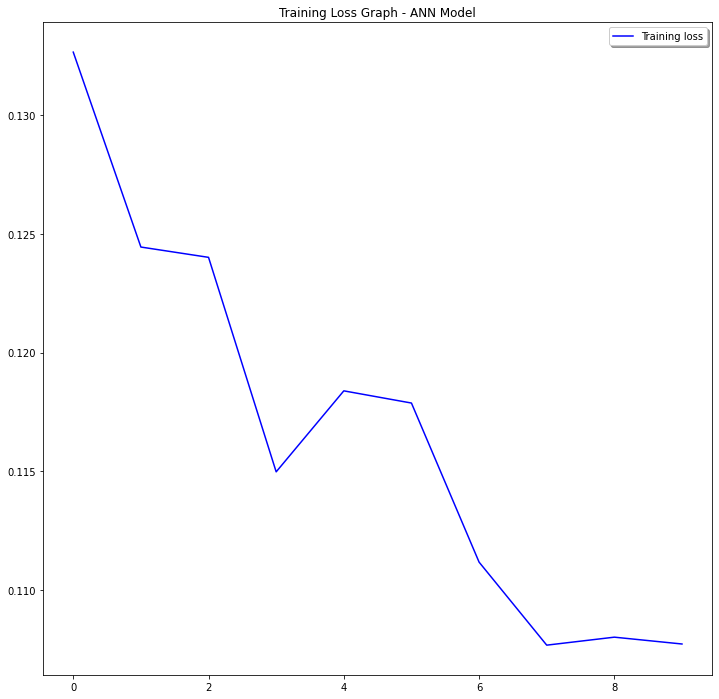

In [ ]:
# Plot the loss curves for training
fi = plt.figure()
fi.set_figwidth(12)
fi.set_figheight(12)
plt.title('Training Loss Graph - ANN Model')

plt.plot(hist_ann.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

# plt.show()
plt.savefig('mhg.png')
fi.savefig('sfs.png')

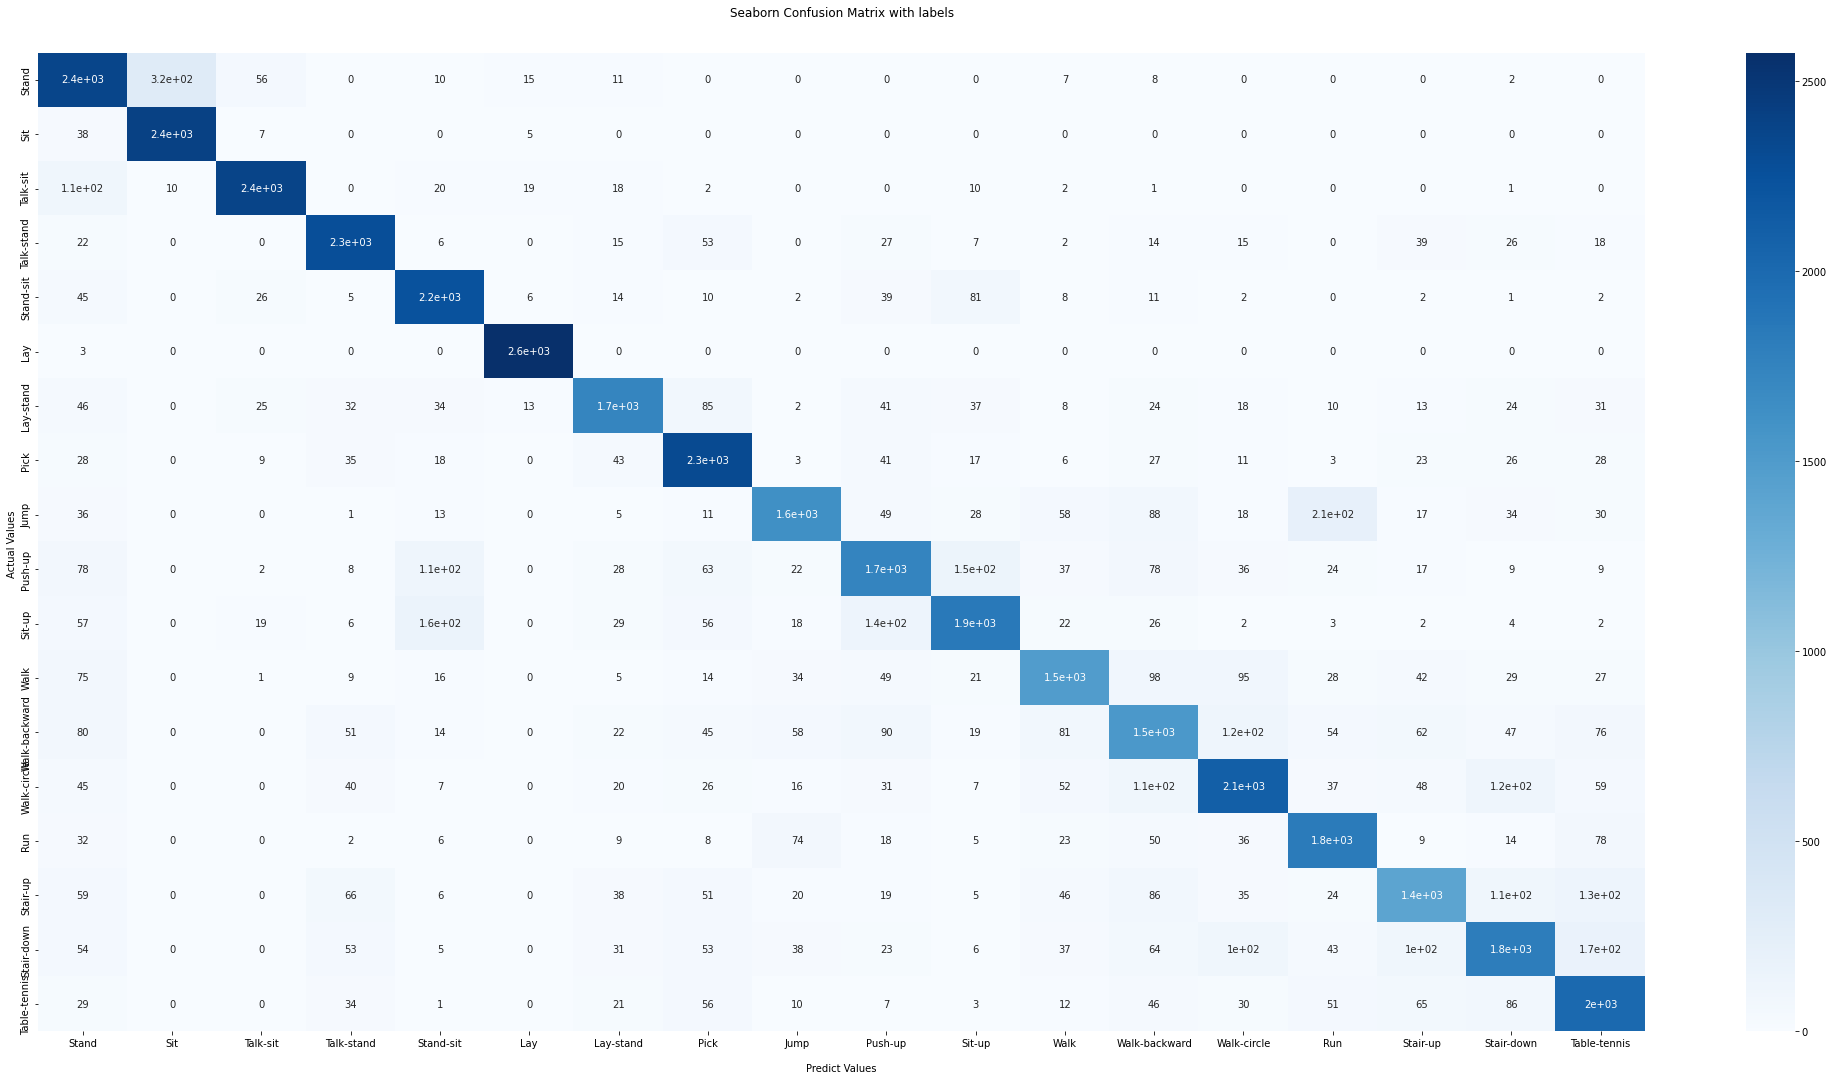

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(36)
f.set_figheight(18)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredict Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stand','Sit','Talk-sit','Talk-stand','Stand-sit','Lay','Lay-stand','Pick','Jump','Push-up','Sit-up','Walk','Walk-backward',
'Walk-circle','Run','Stair-up','Stair-down','Table-tennis'])
ax.yaxis.set_ticklabels(['Stand','Sit','Talk-sit','Talk-stand','Stand-sit','Lay','Lay-stand','Pick','Jump','Push-up','Sit-up','Walk','Walk-backward',
'Walk-circle','Run','Stair-up','Stair-down','Table-tennis'])


# print("Plot after re-sizing: ")
# plt.plot(x, y)
# plt.show()

# ## Display the visualization of the Confusion Matrix.
# plt.figure(figsize = (18,36))
plt.show()
f.savefig('sfsdf.png')

In [ ]:
#Train df_small
model_ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_ann.fit(x_train2, y_train2, epochs=50, batch_size=100)
_, accuracy = model_ann.evaluate(x_train2, y_train2)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
288/288 [==============================] - 13s 44ms/step - loss: 0.7756 - accuracy: 0.7879
Epoch 2/50
288/288 [==============================] - 11s 38ms/step - loss: 0.3132 - accuracy: 0.9019
Epoch 3/50
288/288 [==============================] - 11s 38ms/step - loss: 0.2166 - accuracy: 0.9312
Epoch 4/50
288/288 [==============================] - 13s 44ms/step - loss: 0.1843 - accuracy: 0.9409
Epoch 5/50
288/288 [==============================] - 11s 38ms/step - loss: 0.1544 - accuracy: 0.9501
Epoch 6/50
288/288 [==============================] - 11s 38ms/step - loss: 0.1417 - accuracy: 0.9543
Epoch 7/50
288/288 [==============================] - 11s 38ms/step - loss: 0.1223 - accuracy: 0.9601
Epoch 8/50
288/288 [==============================] - 11s 38ms/step - loss: 0.1302 - accuracy: 0.9604
Epoch 9/50
288/288 [==============================] - 11s 38ms/step - loss: 0.1060 - accuracy: 0.9683
Epoch 10/50
288/288 [==============================] - 11s 38ms/step - loss: 0.108

In [ ]:
#predictions with the model
predictions = (model_ann.predict(x_test2) > 0.5).astype(int)
print('Predicted       :     Actual \n')
for i in range(5):
	#  print('(predicted %d) ==> (expected %d)' % ( predictions[i,:], y_test[i]))
	 print( predictions[i], y_test2[i])

Predicted       :     Actual 

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0] 9
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 14
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] 17
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0] 11


In [ ]:
y_pred = np.array([x.argmax() for x in predictions])
print(y_pred)

[10  8  3 ...  0 16 17]


In [ ]:
from sklearn import metrics
accuracy = accuracy_score(y_test2, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test2, y_pred ,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test2, y_pred ,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test2, y_pred ,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.869861
Precision: 0.871618
Recall: 0.869861
F1 score: 0.868437


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test2, y_pred)
print(cf_matrix)

[[398   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  2 398   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 14   8 368   0   5   5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0 375   0   0   3   1   1   5   0   1   0   0   0   6   3   2]
 [  3   0   1   0 391   2   1   1   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0 400   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   2   2   1   4 369   0   0   5   4   0   0   3   0   2   0   3]
 [  2   0   1   1   5   0   8 360   4   4  10   1   0   1   0   1   1   1]
 [ 11   0   0   0   1   0   0   5 310   7   5   9   5   3  32   3   4   5]
 [ 10   0   0   3   7   0   5   7   5 321  24   0   7   1   0   4   5   1]
 [  7   0   5   1  16   0   4   9   3   7 340   2   3   0   1   1   1   0]
 [ 11   0   0   3   1   0   5   0   6   7   3 323   4  20   3   7   2   5]
 [ 16   0   0   1   3   0   1   3   1   7   1  11 315   7   4  16   6   8]
 [  8   0   0   0   0   0

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test2, y_pred)
print("Classification Report:")
print (result)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       400
           1       0.98      0.99      0.99       400
           2       0.98      0.92      0.95       400
           3       0.94      0.94      0.94       400
           4       0.91      0.98      0.94       400
           5       0.97      1.00      0.99       400
           6       0.90      0.92      0.91       400
           7       0.89      0.90      0.90       400
           8       0.85      0.78      0.81       400
           9       0.82      0.80      0.81       400
          10       0.86      0.85      0.85       400
          11       0.83      0.81      0.82       400
          12       0.85      0.79      0.82       400
          13       0.79      0.89      0.84       400
          14       0.84      0.84      0.84       400
          15       0.80      0.81      0.80       400
          16       0.85      0.63      0.72       400
    

## <font color = 'sky blue'>**Convolutional Neural Network(CNN)**</font>

In [ ]:
print(x_train1.shape[1])

8


In [ ]:
print(y_train1.shape[0])

174935


In [ ]:
#  expanding dimension  
X_train1 = np.expand_dims(x_train1,axis = 2)
Y_train1 = np.expand_dims(y_train1,axis = 1)
X_test1 = np.expand_dims(x_test1,axis = 2)

print(X_train1.shape,Y_train1.shape,X_test1.shape)

(174935, 8, 1) (174935, 1) (43734, 8, 1)


In [ ]:
#CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train1.shape[1], X_train1.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation = 'relu'))
model_cnn.add(Dense(200, activation = 'relu'))
model_cnn.add(Dense(800, activation = 'relu'))
model_cnn.add(Dense(1024, activation = 'relu'))
model_cnn.add(Dense(512, activation = 'relu'))
model_cnn.add(Dense(256, activation = 'relu'))
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dense(64, activation = 'relu'))
model_cnn.add(Dense(36, activation = 'relu'))
model_cnn.add(Dense(18, activation = 'softmax'))

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_27 (Dense)            (None, 32)                6176      
                                                                 
 dense_28 (Dense)            (None, 200)               6600      
                                                                 
 dense_29 (Dense)            (None, 800)               160800    
                                                      

In [ ]:
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics = ['mean_squared_error','accuracy'])
history_cnn = model_cnn.fit(X_train1, y_train1, epochs=40, batch_size=1000)
_, pre, accuracy = model_cnn.evaluate(X_train1, y_train1)
print('Accuracy: %.2f' % (accuracy*100))

# 84.46%


Epoch 1/40
175/175 [==============================] - 36s 200ms/step - loss: 1.1487 - mean_squared_error: 96.2991 - accuracy: 0.6020
Epoch 2/40
175/175 [==============================] - 35s 200ms/step - loss: 1.0916 - mean_squared_error: 96.3006 - accuracy: 0.6241
Epoch 3/40
175/175 [==============================] - 39s 224ms/step - loss: 1.0542 - mean_squared_error: 96.3015 - accuracy: 0.6397
Epoch 4/40
175/175 [==============================] - 35s 200ms/step - loss: 1.0243 - mean_squared_error: 96.3022 - accuracy: 0.6494
Epoch 5/40
175/175 [==============================] - 35s 200ms/step - loss: 0.9929 - mean_squared_error: 96.3030 - accuracy: 0.6613
Epoch 6/40
175/175 [==============================] - 39s 223ms/step - loss: 0.9665 - mean_squared_error: 96.3036 - accuracy: 0.6699
Epoch 7/40
175/175 [==============================] - 35s 200ms/step - loss: 0.9453 - mean_squared_error: 96.3041 - accuracy: 0.6778
Epoch 8/40
175/175 [==============================] - 35s 201ms/step 

In [ ]:
#predictions with the model
predictions = (model_cnn.predict(x_test1) > 0.5).astype(int)
print('Predicted       :     Actual \n')
for i in range(5):
	#  print('(predicted %d) ==> (expected %d)' % ( predictions[i,:], y_test[i]))
	 print( predictions[i], y_test1[i])

Predicted       :     Actual 

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0] 3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 9
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 2
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0] 11
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 3


In [ ]:
y_pred = np.array([x.argmax() for x in predictions])
print(y_pred)

[7 0 2 ... 5 4 2]


In [ ]:
from sklearn import metrics
accuracy = accuracy_score(y_test1, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.706476
Precision: 0.735959
Recall: 0.701772
F1 score: 0.711460


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test1, y_pred)
print(cf_matrix)

[[2455  168  148    1    8    7    3    1    0    0    2    0    0    0
     0    0    0    0]
 [ 356 2076   26    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [ 246    8 2236    1   30   15   18    6    0    0    6    0    0    0
     0    0    0    0]
 [ 172    0    1 1964    2    0   57   68    1   42    9    3   22   34
     0   83   20   41]
 [ 199    0   46    1 1881    3   11   13   12  108  206   11    3    1
     0    0    0    0]
 [  81    0   49    0    1 2441    6    0    0    0    0    0    0    0
     0    0    0    0]
 [ 228    2   48   55   41   12 1405   96    2   57   59    7   32   21
     8   44   21   45]
 [ 191    0    3   62   27    0  112 1850    7   56   50    9   52   24
     5   99   43   45]
 [ 124    0    0    0   13    0    4   10 1542   41   36   54   98   19
   223   16   28   17]
 [ 346    0    1   13  115    0   14   49   17 1504  134   48  102   34
    17    8    2    6]
 [ 234    0   21    6  210    0   51   43   13  15

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test1, y_pred)
print("Classification Report:")
print (result)

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.88      0.54      2793
           1       0.92      0.84      0.88      2458
           2       0.87      0.87      0.87      2566
           3       0.84      0.78      0.81      2519
           4       0.79      0.75      0.77      2495
           5       0.99      0.95      0.97      2578
           6       0.76      0.64      0.70      2183
           7       0.78      0.70      0.74      2635
           8       0.76      0.69      0.72      2225
           9       0.64      0.62      0.63      2410
          10       0.73      0.67      0.70      2396
          11       0.71      0.62      0.66      2036
          12       0.54      0.53      0.53      2356
          13       0.74      0.60      0.66      2729
          14       0.75      0.72      0.74      2196
          15       0.60      0.53      0.56      2098
          16       0.75      0.59      0.66      2601
    

In [ ]:
#  expanding dimension  
X_train2 = np.expand_dims(x_train2,axis = 2)
Y_train2 = np.expand_dims(y_train2,axis = 1)
X_test2 = np.expand_dims(x_test2,axis = 2)

print(X_train2.shape,Y_train2.shape,X_test2.shape)

(28800, 8, 1) (28800, 1) (7200, 8, 1)


In [ ]:
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics = ['mean_squared_error','accuracy'])
history_cnn = model_cnn.fit(X_train2, y_train2, epochs=30, batch_size=100)
_, pre, accuracy = model_cnn.evaluate(X_train2, y_train2)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
288/288 [==============================] - 12s 39ms/step - loss: 1.3289 - mean_squared_error: 98.2506 - accuracy: 0.5926
Epoch 2/30
288/288 [==============================] - 11s 39ms/step - loss: 0.9124 - mean_squared_error: 98.2550 - accuracy: 0.6967
Epoch 3/30
288/288 [==============================] - 11s 39ms/step - loss: 0.7935 - mean_squared_error: 98.2576 - accuracy: 0.7349
Epoch 4/30
288/288 [==============================] - 15s 52ms/step - loss: 0.7117 - mean_squared_error: 98.2594 - accuracy: 0.7609
Epoch 5/30
288/288 [==============================] - 12s 42ms/step - loss: 0.6278 - mean_squared_error: 98.2613 - accuracy: 0.7914
Epoch 6/30
288/288 [==============================] - 11s 39ms/step - loss: 0.5614 - mean_squared_error: 98.2629 - accuracy: 0.8131
Epoch 7/30
288/288 [==============================] - 11s 39ms/step - loss: 0.5295 - mean_squared_error: 98.2636 - accuracy: 0.8195
Epoch 8/30
288/288 [==============================] - 11s 39ms/step - loss: 

In [ ]:
#predictions with the model
predictions = (model_cnn.predict(x_test2) > 0.5).astype(int)
print('Predicted       :     Actual \n')
for i in range(5):
	#  print('(predicted %d) ==> (expected %d)' % ( predictions[i,:], y_test[i]))
	 print( predictions[i], y_test2[i])

Predicted       :     Actual 

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0] 9
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] 14
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1] 17
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0] 11


In [ ]:
y_pred = np.array([x.argmax() for x in predictions])
print(y_pred)

[10  8  3 ...  0 16 17]


In [ ]:
from sklearn import metrics
accuracy = accuracy_score(y_test2, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test2, y_pred ,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test2, y_pred ,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test2, y_pred ,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.775278
Precision: 0.778633
Recall: 0.775278
F1 score: 0.773641


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test2, y_pred)
print(cf_matrix)

[[365  30   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 400   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 25   7 358   0   1   2   2   0   0   0   5   0   0   0   0   0   0   0]
 [  6   0   0 367   0   0   1   4   0   5   0   2   4   2   0   5   4   0]
 [  2   0   6   0 378   0   4   0   0   3   6   0   1   0   0   0   0   0]
 [ 12   1   6   0   0 381   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 13   0  11   3   3   3 338   2   2   7   5   0   1   4   0   4   1   3]
 [ 13   0   1   7  10   0   7 318   2   7   9   1  10   4   1   4   6   0]
 [ 10   0   0   0   5   0   2   7 271   8   3  17  10   4  46   3  12   2]
 [ 24   0   1   1   7   0   5  15   8 273  19   7  10   9   3  11   7   0]
 [ 16   0   9   2  30   0   9  13   3  14 285   4   8   2   1   4   0   0]
 [ 23   0   0   8   0   0   8   5   9  15   5 256   9  15   4  23  17   3]
 [ 31   0   0   4   5   0   2  20   0  12   9  18 250   8   3  23   8   7]
 [ 21   0   0   7   2   0

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test2, y_pred)
print("Classification Report:")
print (result)

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.91      0.72       400
           1       0.91      1.00      0.95       400
           2       0.90      0.90      0.90       400
           3       0.87      0.92      0.89       400
           4       0.85      0.94      0.90       400
           5       0.99      0.95      0.97       400
           6       0.86      0.84      0.85       400
           7       0.76      0.80      0.78       400
           8       0.77      0.68      0.72       400
           9       0.70      0.68      0.69       400
          10       0.79      0.71      0.75       400
          11       0.68      0.64      0.66       400
          12       0.71      0.62      0.66       400
          13       0.71      0.67      0.68       400
          14       0.75      0.76      0.76       400
          15       0.67      0.66      0.67       400
          16       0.66      0.56      0.60       400
    

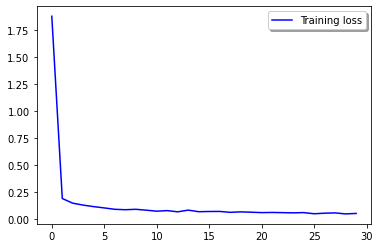

In [ ]:
plt.plot(history_cnn.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

## <font color = 'sky blue'>**Long Short-term Memory(LSTM)**</font>

In [ ]:
# lstm model
model_lstm = Sequential()
model_lstm.add(LSTM(units = 32,input_shape = (8,1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(200,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(800,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1024,activation='relu'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(512,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(256,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(128,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(36,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(18 ,activation='softmax'))

model_lstm.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 200)               6600      
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_38 (Dense)            (None, 800)               160800    
                                                                 
 dropout_2 (Dropout)         (None, 800)               0         
                                                                 
 dense_39 (Dense)            (None, 1024)             

In [ ]:
model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error','accuracy'])
history_lstm = model_lstm.fit(X_train1,y_train1,batch_size = 1000 ,epochs = 30)

_, pre, accuracy = model_lstm.evaluate(X_train1, y_train1)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/30
175/175 [==============================] - 48s 260ms/step - loss: 96.2760 - mean_squared_error: 96.2760 - accuracy: 0.0576
Epoch 2/30
175/175 [==============================] - 57s 324ms/step - loss: 96.2760 - mean_squared_error: 96.2760 - accuracy: 0.0575
Epoch 3/30
175/175 [==============================] - 51s 291ms/step - loss: 96.2760 - mean_squared_error: 96.2760 - accuracy: 0.0573
Epoch 4/30
175/175 [==============================] - 50s 283ms/step - loss: 96.2760 - mean_squared_error: 96.2760 - accuracy: 0.0557
Epoch 5/30
175/175 [==============================] - 47s 271ms/step - loss: 96.2761 - mean_squared_error: 96.2761 - accuracy: 0.0558
Epoch 6/30
175/175 [==============================] - 43s 248ms/step - loss: 96.2761 - mean_squared_error: 96.2761 - accuracy: 0.0567
Epoch 7/30
175/175 [==============================] - 44s 249ms/step - loss: 96.2760 - mean_squared_error: 96.2760 - accuracy: 0.0566
Epoch 8/30
175/175 [==============================] - 48s 271m

In [ ]:
# lstm model
model_lstm = Sequential()
model_lstm.add(LSTM(units = 1024,input_shape = (8,1)))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(512,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(256,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(128,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(36,activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(18 ,activation='softmax'))

model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1024)              4202496   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_46 (Dense)            (None, 512)               524800    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_47 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 128)              

In [ ]:
model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error','accuracy'])
history_lstm = model_lstm.fit(X_train2,y_train2,batch_size = 1000 ,epochs = 20)

_, pre, accuracy = model_lstm.evaluate(X_train2, y_train2)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
29/29 [==============================] - 123s 4s/step - loss: 98.2253 - mean_squared_error: 98.2253 - accuracy: 0.0549
Epoch 2/20
29/29 [==============================] - 120s 4s/step - loss: 98.2253 - mean_squared_error: 98.2253 - accuracy: 0.0581
Epoch 3/20
29/29 [==============================] - 120s 4s/step - loss: 98.2253 - mean_squared_error: 98.2253 - accuracy: 0.0577
Epoch 4/20
29/29 [==============================] - 121s 4s/step - loss: 98.2253 - mean_squared_error: 98.2253 - accuracy: 0.0579
Epoch 5/20
29/29 [==============================] - 118s 4s/step - loss: 98.2253 - mean_squared_error: 98.2253 - accuracy: 0.0573
Epoch 6/20
29/29 [==============================] - 121s 4s/step - loss: 98.2253 - mean_squared_error: 98.2253 - accuracy: 0.0555
Epoch 7/20
29/29 [==============================] - 121s 4s/step - loss: 98.2253 - mean_squared_error: 98.2253 - accuracy: 0.0535
Epoch 8/20
29/29 [==============================] - 120s 4s/step - loss: 98.2253 - mean_sq

In [ ]:
model_lstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error','accuracy'])
history_lstm = model_lstm.fit(X_train3,y_train3,batch_size = 100 ,epochs = 20)

_, pre, accuracy = model_lstm.evaluate(X_train3, y_train3)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
211/211 [==============================] - 135s 629ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - accuracy: 0.0861
Epoch 2/20
211/211 [==============================] - 134s 636ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - accuracy: 0.0880
Epoch 3/20
211/211 [==============================] - 133s 630ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - accuracy: 0.0355
Epoch 4/20
211/211 [==============================] - 133s 629ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - accuracy: 0.0692
Epoch 5/20
211/211 [==============================] - 133s 629ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - accuracy: 0.0328
Epoch 6/20
211/211 [==============================] - 132s 627ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - accuracy: 0.0411
Epoch 7/20
211/211 [==============================] - 132s 628ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - accuracy: 0.0438
Epoch 8/20
211/211 [==============================] - 131s 620ms/step

In [ ]:
#predictions with the model
predictions = (model_lstm.predict(x_test1) > 0.5).astype(int)
print('Predicted       :     Actual \n')
for i in range(5):
	#  print('(predicted %d) ==> (expected %d)' % ( predictions[i,:], y_test[i]))
	 print( predictions[i], y_test1[i])

In [ ]:
y_pred = np.array([x.argmax() for x in predictions])
print(y_pred)

In [ ]:
from sklearn import metrics
accuracy = accuracy_score(y_test1, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test1, y_pred ,pos_label='positive',average='macro')
print('F1 score: %f' % f1)

In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test1, y_pred)
print(cf_matrix)

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test1, y_pred)
print("Classification Report:")
print (result)

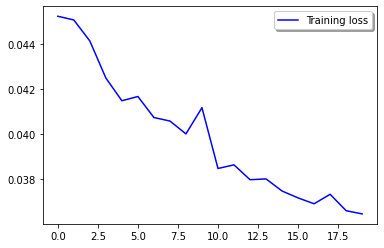

In [ ]:
# Plot the loss curves for training
plt.plot(history_lstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
#predictions with the model
prediction_lstm = (model_lstm.predict(X_test)> 0.5).astype(int)
print('Predicted       :     Actual \n')
for i in range(15):
	print('(predicted %d) ==> (expected %d)' % ( prediction_lstm[i], y_test[i]))

Predicted       :     Actual 

(predicted 1) ==> (expected 0)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)


In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
cm = confusion_matrix(y_test, prediction_lstm)
print(cm)
print(accuracy_score(y_test, prediction_lstm))
print(f1_score(y_test, prediction_lstm))

[[2634  156]
 [ 103 2358]]
0.9506760617025328
0.9479396984924623


In [ ]:
prediction_lstm.shape

(5251, 1)

## <font color = 'sky blue'>**CNN-LSTM Model**</font>


In [ ]:
#Reshape from [samples, timesteps, features] into [samples, subsequences, timesteps, features]

subsequences = 2
timesteps = X_train.shape[1]//subsequences
X_train_series_sub = X_train.reshape((X_train.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)


Train set shape (21004, 2, 4, 1)


In [ ]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(32, activation='relu'))
model_cnn_lstm.add(Dense(1, activation='sigmoid'))

model_cnn_lstm.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 4, 64)      128       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 2, 64)      0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 128)        0         
 tributed)                                                       
                                                                 
 module_wrapper (ModuleWrapp  (None, 32)               20608     
 er)                                                             
                                                                 
 dense_30 (Dense)            (None, 1)               

In [ ]:
model_cnn_lstm.compile(loss='mse', optimizer=keras.optimizers.Adam(),metrics = ['mean_squared_error','accuracy'])
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, y_train, epochs=20)

_, pre, accuracy = model_cnn_lstm.evaluate(X_train_series_sub, y_train)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/20
657/657 [==============================] - 9s 9ms/step - loss: 0.1578 - mean_squared_error: 0.1578 - accuracy: 0.7531
Epoch 2/20
657/657 [==============================] - 4s 6ms/step - loss: 0.1013 - mean_squared_error: 0.1013 - accuracy: 0.8602
Epoch 3/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0800 - mean_squared_error: 0.0800 - accuracy: 0.8921
Epoch 4/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0714 - mean_squared_error: 0.0714 - accuracy: 0.9039
Epoch 5/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0650 - mean_squared_error: 0.0650 - accuracy: 0.9143
Epoch 6/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0615 - mean_squared_error: 0.0615 - accuracy: 0.9186
Epoch 7/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0602 - mean_squared_error: 0.0602 - accuracy: 0.9194
Epoch 8/20
657/657 [==============================] - 7s 10ms/step - loss: 0.0579 - mean_squared_

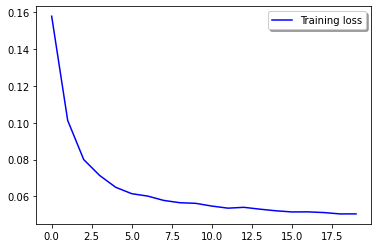

In [ ]:
plt.plot(cnn_lstm_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
#predictions with the model

subsequences = 2
timesteps = X_test.shape[1]//subsequences
X_test_series_sub = X_test.reshape((X_test.shape[0], subsequences, timesteps, 1))
print('Test set shape', X_test_series_sub.shape)

prediction_cnn_lstm = (model_cnn_lstm.predict(X_test_series_sub)> 0.5).astype(int)
print('Predicted       :     Actual \n')
for i in range(15):
	print('(predicted %d) ==> (expected %d)' % ( prediction_cnn_lstm[i], y_test[i]))

Train set shape (5251, 2, 4, 1)
Predicted       :     Actual 

(predicted 1) ==> (expected 0)
(predicted 0) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)
(predicted 1) ==> (expected 1)


In [ ]:
cm = confusion_matrix(y_test, prediction_cnn_lstm)
print(cm)
print(accuracy_score(y_test, prediction_cnn_lstm))
print(f1_score(y_test, prediction_cnn_lstm))

[[2562  228]
 [ 153 2308]]
0.9274423919253475
0.923754252551531


## <font color = 'sky blue'>**Bi-directional LSTM**</font>

In [ ]:
X_train.shape

(21004, 8, 1)

In [ ]:
# bilstm model

model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(64, return_sequences=True), input_shape = (X_train.shape[1], X_train.shape[2])))
model_bilstm.add(Dropout(0.4))
model_bilstm.add(Dense(1 ,activation='sigmoid'))

model_bilstm.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 8, 128)           33792     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 8, 128)            0         
                                                                 
 dense_34 (Dense)            (None, 8, 1)              129       
                                                                 
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_bilstm.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error','accuracy'])
history_bilstm = model_bilstm.fit(X_train,y_train,batch_size = 100,epochs = 20)

_, pre, accuracy = model_bilstm.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
211/211 [==============================] - 7s 17ms/step - loss: 0.2492 - mean_squared_error: 0.2492 - accuracy: 0.5302
Epoch 2/20
211/211 [==============================] - 4s 19ms/step - loss: 0.2491 - mean_squared_error: 0.2491 - accuracy: 0.5320
Epoch 3/20
211/211 [==============================] - 6s 28ms/step - loss: 0.2491 - mean_squared_error: 0.2491 - accuracy: 0.5321
Epoch 4/20
211/211 [==============================] - 4s 17ms/step - loss: 0.2490 - mean_squared_error: 0.2490 - accuracy: 0.5321
Epoch 5/20
211/211 [==============================] - 4s 17ms/step - loss: 0.2491 - mean_squared_error: 0.2491 - accuracy: 0.5321
Epoch 6/20
211/211 [==============================] - 4s 20ms/step - loss: 0.2490 - mean_squared_error: 0.2490 - accuracy: 0.5321
Epoch 7/20
211/211 [==============================] - 6s 27ms/step - loss: 0.2490 - mean_squared_error: 0.2490 - accuracy: 0.5321
Epoch 8/20
211/211 [==============================] - 4s 17ms/step - loss: 0.2490 - mean_s

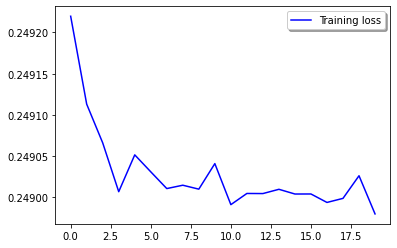

In [ ]:
# Plot the loss curves for training
plt.plot(history_bilstm.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
#predictions with the model
prediction_bilstm = (model_bilstm.predict(X_test)> 0.5).astype(int)
prediction_bilstm.shape

(5251, 8, 1)

In [ ]:
p = np.zeros( (5251, 8, 1) )
prediction_bilstm_mod = p[:, 0, :]
print(prediction_bilstm_mod.shape)

(5251, 1)


In [ ]:
print('Predicted       :     Actual \n')
for i in range(15):
	print('(predicted %d) ==> (expected %d)' % ( prediction_bilstm_mod[i], y_test[i]))

Predicted       :     Actual 

(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)


In [ ]:
cm = confusion_matrix(y_test, prediction_bilstm_mod)
print(cm)
print(accuracy_score(y_test, prediction_bilstm_mod))
print(f1_score(y_test, prediction_bilstm_mod))

[[2790    0]
 [2461    0]]
0.5313273662159589
0.0


## <font color = 'sky blue'>**Convolutional LSTM**</font>

In [ ]:
from keras.layers.convolutional_recurrent import ConvLSTM1D
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D

In [ ]:
conv_lstm = Sequential()

conv_lstm.add(ConvLSTM1D(filters=64, kernel_size=1, activation='relu', 
                         input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3]), 
                         padding='same', return_sequences=True))
conv_lstm.add(BatchNormalization())

conv_lstm.add(ConvLSTM1D(filters=64, kernel_size=1, activation='relu', 
                         input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3]), 
                         padding='same', return_sequences=True))
conv_lstm.add(BatchNormalization())

conv_lstm.add(Conv2D(filters=1, kernel_size=2,
               activation='sigmoid',
               padding='same', data_format='channels_last'))

conv_lstm.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_7 (ConvLSTM1D)  (None, None, 4, 64)       16896     
                                                                 
 batch_normalization_5 (Batc  (None, None, 4, 64)      256       
 hNormalization)                                                 
                                                                 
 conv_lstm1d_8 (ConvLSTM1D)  (None, None, 4, 64)       33024     
                                                                 
 batch_normalization_6 (Batc  (None, None, 4, 64)      256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, None, 4, 1)        257       
                                                                 
Total params: 50,689
Trainable params: 50,433
Non-tra

In [ ]:
conv_lstm.compile(loss='mse', optimizer=keras.optimizers.Adam(),metrics = ['mean_squared_error','accuracy'])
conv_lstm_history = conv_lstm.fit(X_train_series_sub, y_train, epochs=20)

_, pre, accuracy = conv_lstm.evaluate(X_train_series_sub, y_train)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/20
657/657 [==============================] - 17s 15ms/step - loss: 0.2496 - mean_squared_error: 0.2496 - accuracy: 0.5270
Epoch 2/20
657/657 [==============================] - 10s 16ms/step - loss: 0.2492 - mean_squared_error: 0.2492 - accuracy: 0.5300
Epoch 3/20
657/657 [==============================] - 11s 17ms/step - loss: 0.2490 - mean_squared_error: 0.2490 - accuracy: 0.5310
Epoch 4/20
657/657 [==============================] - 11s 17ms/step - loss: 0.2490 - mean_squared_error: 0.2490 - accuracy: 0.5309
Epoch 5/20
657/657 [==============================] - 14s 21ms/step - loss: 0.2490 - mean_squared_error: 0.2490 - accuracy: 0.5319
Epoch 6/20
657/657 [==============================] - 15s 23ms/step - loss: 0.2489 - mean_squared_error: 0.2489 - accuracy: 0.5313
Epoch 7/20
657/657 [==============================] - 10s 16ms/step - loss: 0.2487 - mean_squared_error: 0.2487 - accuracy: 0.5328
Epoch 8/20
657/657 [==============================] - 13s 19ms/step - loss: 0.2486 

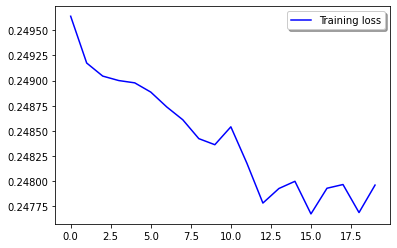

In [ ]:
plt.plot(conv_lstm_history.history['loss'], color='b', label="Training loss")
plt.legend(loc='best', shadow=True)

In [ ]:
#predictions with the model

# subsequences = 2
# timesteps = X_test.shape[1]//subsequences
# X_test_series_sub = X_test.reshape((X_test.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_test_series_sub.shape)

prediction_conv_lstm = (conv_lstm.predict(X_test_series_sub)> 0.5).astype(int)
print(prediction_conv_lstm.shape)

q = np.zeros( (5251,2, 4, 1) )
prediction_convlstm_mod = q[:, 0,0, :]
print(prediction_convlstm_mod.shape)

print('Predicted       :     Actual \n')
for i in range(15):
	print('(predicted %d) ==> (expected %d)' % ( prediction_convlstm_mod[i], y_test[i]))

Train set shape (5251, 2, 4, 1)
(5251, 2, 4, 1)
(5251, 1)
Predicted       :     Actual 

(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 0)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)
(predicted 0) ==> (expected 1)


In [ ]:
cm = confusion_matrix(y_test, prediction_convlstm_mod)
print(cm)
print(accuracy_score(y_test, prediction_convlstm_mod))
print(f1_score(y_test, prediction_convlstm_mod))

[[2790    0]
 [2461    0]]
0.5313273662159589
0.0
